**РК1 ММО**

Студент: Сафин Рустам Равильевич

Группа: ИУ5-21М

Вариант в группе: 12

Вариант задачи №1 (Задание 12): Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "логарифм - np.log(X)".

Вариант задачи №2 (Задание 32): Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), обратный алгоритм (sequential backward selection).

Дополнительное задание по группам: Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
sns.set(style="ticks")

**Задача №1 (№12)**

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "логарифм - np.log(X)".

In [2]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [3]:
data = pd.read_csv("/content/data/LeagueofLegends.csv", sep=",")

In [4]:
data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


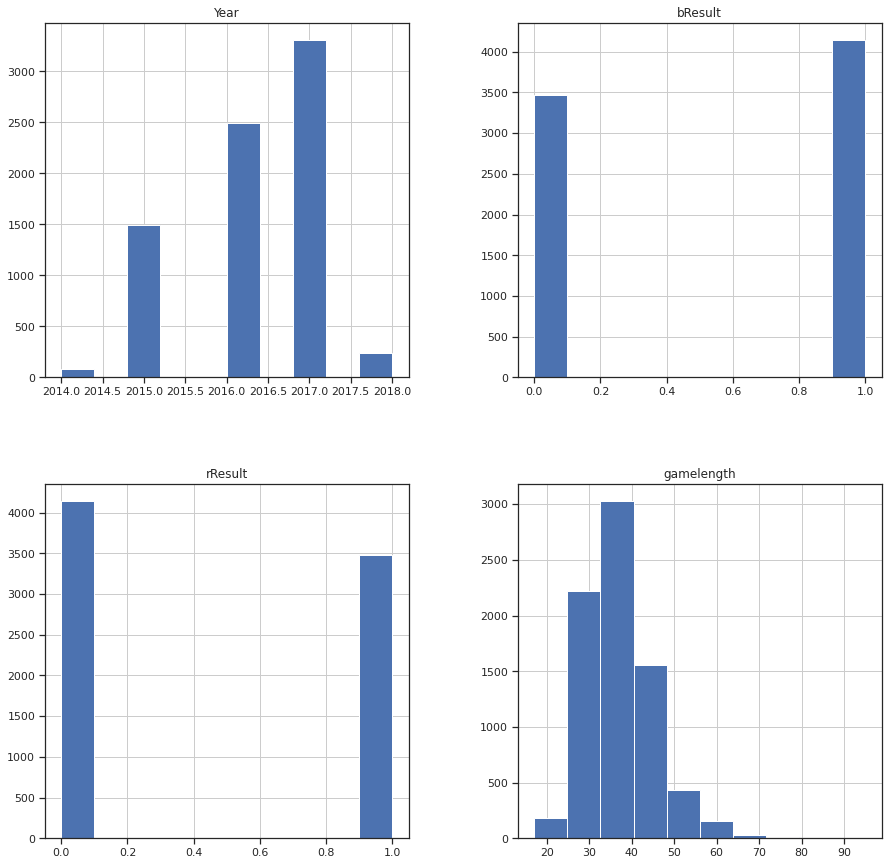

In [5]:
data.hist(figsize=(15,15))
plt.show()

Посмотрим на исходное распределение одного из признаков.

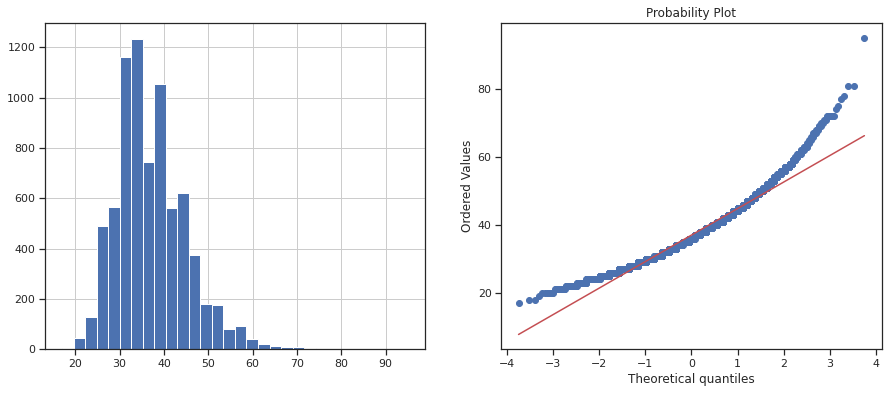

In [6]:
diagnostic_plots(data, 'gamelength')

Как можно заметить, распределение этого признака немного отличается от нормального. Попробуем провести нормализацию признака с помощью функции логарифма.

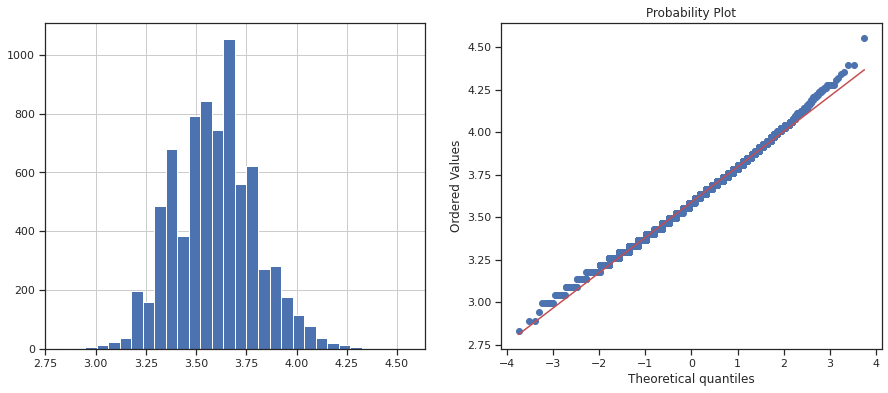

In [7]:
data['gamelength_log'] = np.log(data['gamelength'])
diagnostic_plots(data, 'gamelength_log')

Таким образом, мы получили нормальное распределение этого числового признака.

**Задача №2 (№32)**

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), обратный алгоритм (sequential backward selection).

In [ ]:
wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_feature_names = wine['feature_names']
wine_x_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

knn = KNeighborsClassifier(n_neighbors=3)

sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          verbose=2,
          scoring='accuracy',
          cv=4)
sbs = sbs.fit(wine_X, wine_y)

In [32]:
sbs.subsets_

{1: {'avg_score': 0.7532299741602068,
  'cv_scores': array([0.66666667, 0.77777778, 0.77777778, 0.79069767]),
  'feature_idx': (6,),
  'feature_names': ('6',)},
 2: {'avg_score': 0.9105943152454781,
  'cv_scores': array([0.8       , 0.91111111, 0.97777778, 0.95348837]),
  'feature_idx': (6, 9),
  'feature_names': ('6', '9')},
 3: {'avg_score': 0.9277777777777778,
  'cv_scores': array([0.75555556, 0.95555556, 1.        , 1.        ]),
  'feature_idx': (0, 6, 9),
  'feature_names': ('0', '6', '9')},
 4: {'avg_score': 0.9388888888888889,
  'cv_scores': array([0.77777778, 0.97777778, 1.        , 1.        ]),
  'feature_idx': (0, 6, 8, 9),
  'feature_names': ('0', '6', '8', '9')},
 5: {'avg_score': 0.9386304909560723,
  'cv_scores': array([0.82222222, 0.95555556, 1.        , 0.97674419]),
  'feature_idx': (0, 3, 6, 8, 9),
  'feature_names': ('0', '3', '6', '8', '9')},
 6: {'avg_score': 0.9500000000000001,
  'cv_scores': array([0.86666667, 0.95555556, 0.97777778, 1.        ]),
  'feature_id

In [33]:
sbs.k_feature_idx_

(6,)

In [34]:
sbs.k_feature_names_

('6',)

In [35]:
sbs.k_score_

0.7532299741602068

Из проведённого анализа видно, что наивысшей точностью модель обладает при 7 признаках. Проведём повторный прогон, для нахождения 7 признаков.

In [ ]:
sbs = SFS(knn, 
          k_features=7, 
          forward=False, 
          floating=False, 
          verbose=2,
          scoring='accuracy',
          cv=4)
sbs = sbs.fit(wine_X, wine_y)

In [37]:
sbs.subsets_

{7: {'avg_score': 0.9555555555555556,
  'cv_scores': array([0.86666667, 0.95555556, 1.        , 1.        ]),
  'feature_idx': (0, 2, 3, 6, 8, 9, 11),
  'feature_names': ('0', '2', '3', '6', '8', '9', '11')},
 8: {'avg_score': 0.9555555555555556,
  'cv_scores': array([0.86666667, 0.95555556, 1.        , 1.        ]),
  'feature_idx': (0, 2, 3, 6, 7, 8, 9, 11),
  'feature_names': ('0', '2', '3', '6', '7', '8', '9', '11')},
 9: {'avg_score': 0.9555555555555556,
  'cv_scores': array([0.88888889, 0.95555556, 0.97777778, 1.        ]),
  'feature_idx': (0, 1, 2, 3, 6, 7, 8, 9, 11),
  'feature_names': ('0', '1', '2', '3', '6', '7', '8', '9', '11')},
 10: {'avg_score': 0.9500000000000001,
  'cv_scores': array([0.86666667, 0.95555556, 0.97777778, 1.        ]),
  'feature_idx': (0, 1, 2, 3, 6, 7, 8, 9, 10, 11),
  'feature_names': ('0', '1', '2', '3', '6', '7', '8', '9', '10', '11')},
 11: {'avg_score': 0.9388888888888889,
  'cv_scores': array([0.84444444, 0.93333333, 0.97777778, 1.        ]),
  

Просмотрим индексы оставшихся 7 признаков

In [38]:
sbs.k_feature_idx_

(0, 2, 3, 6, 8, 9, 11)

In [39]:
sbs.k_feature_names_

('0', '2', '3', '6', '8', '9', '11')

Посмотрим на точность полученной модели.

In [40]:
sbs.k_score_

0.9555555555555556

**Дополнительное задание**

Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

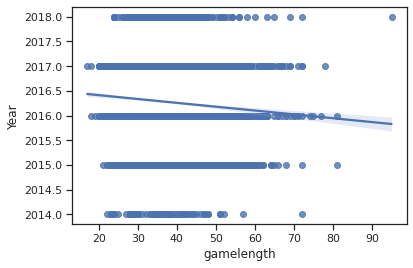

In [46]:
sns.regplot(x=data['gamelength'], y=data['Year'])

Построили график рассеяния, показывающий зависимость между двумя признаками: gamelength (продолжительностью игры) и Year (годом)